In [165]:
import pandas as pd
import numpy as np

In [166]:
df=pd.read_csv("../Dataset/engineers_salary_prediction_train.csv")
test=pd.read_csv("../Dataset/engineers_salary_prediction_test.csv")

In [167]:
df.head()

,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,job_desc_007,job_desc_008,job_desc_009,job_desc_010,job_desc_011,job_desc_012,job_desc_013,job_desc_014,job_desc_015,job_desc_016,job_desc_017,job_desc_018,job_desc_019,job_desc_020,job_desc_021,job_desc_022,job_desc_023,...,job_desc_261,job_desc_262,job_desc_263,job_desc_264,job_desc_265,job_desc_266,job_desc_267,job_desc_268,job_desc_269,job_desc_270,job_desc_271,job_desc_272,job_desc_273,job_desc_274,job_desc_275,job_desc_276,job_desc_277,job_desc_278,job_desc_279,job_desc_280,job_desc_281,job_desc_282,job_desc_283,job_desc_284,job_desc_285,job_desc_286,job_desc_287,job_desc_288,job_desc_289,job_desc_290,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
0,1,Others,2024/07,High,NY,A,0.6429,False,False,True,True,True,False,False,60.0,True,False,0.193511,2.275482,-0.440363,-0.327473,0.058464,-0.154043,-0.393158,-0.367905,-0.703665,0.562969,0.058359,-0.632267,0.326872,-0.276131,0.098252,0.019475,0.105348,-0.411405,0.635027,-0.192049,3.849681,0.529550,0.269379,...,0.111471,0.266141,-0.142156,-0.684483,-0.174529,0.467105,-0.024953,-0.167435,-0.342473,0.185418,-0.233041,-0.016037,0.602155,-0.511326,0.602380,-0.254410,-0.114025,0.086060,-0.012974,0.523685,-0.864781,0.084526,0.154640,0.283154,-0.848735,-0.108635,0.049179,0.210502,-0.535840,0.113221,-0.362079,-0.499308,-0.367894,-0.214881,0.014870,-0.271177,-0.113347,-0.587955,-0.919095,-0.207340
1,2,Job_Title_1,2024/07,Low,CA,A,0.4678,False,False,False,True,True,True,False,60.0,True,True,0.100152,2.291134,-0.356041,-0.494735,0.038632,-0.356995,-0.633020,-0.444805,-0.252597,0.187210,0.261958,-0.734535,0.264041,-0.209023,0.144627,-0.182167,0.144194,-0.436690,0.405126,-0.240945,3.781854,0.436835,0.150631,...,-0.033901,0.475052,-0.016039,-0.412693,-0.424291,0.518947,-0.151527,-0.065834,-0.395344,0.048340,-0.198469,0.026100,0.390649,-0.484126,0.533130,-0.196634,-0.330162,0.200502,0.047225,0.263908,-0.817924,-0.069964,0.357457,0.323456,-0.977607,-0.034979,-0.053379,-0.027340,-0.511633,-0.105435,-0.300989,-0.415411,-0.341824,-0.319064,0.042322,-0.124755,0.023489,-0.893224,-0.823024,0.112364
2,3,Others,2024/07,Low,CA,A,0.4610,False,False,False,True,True,True,False,36.0,True,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,Others,2024/07,Low,CA,A,0.5064,False,False,False,True,True,True,False,72.0,True,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,Others,2024/07,Low,CA,A,0.4640,False,False,False,True,True,False,False,48.0,True,True,0.406864,1.986625,-0.726046,-0.316294,0.062115,-0.451118,-0.659871,-0.451544,-0.505597,0.119204,-0.542267,-0.623306,0.048583,-0.103152,-0.007468,0.236105,0.204340,-0.280865,0.203199,-0.435

In [168]:
test.head()

,obs,job_title,job_posted_date,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,job_desc_007,job_desc_008,job_desc_009,job_desc_010,job_desc_011,job_desc_012,job_desc_013,job_desc_014,job_desc_015,job_desc_016,job_desc_017,job_desc_018,job_desc_019,job_desc_020,job_desc_021,job_desc_022,job_desc_023,job_desc_024,...,job_desc_261,job_desc_262,job_desc_263,job_desc_264,job_desc_265,job_desc_266,job_desc_267,job_desc_268,job_desc_269,job_desc_270,job_desc_271,job_desc_272,job_desc_273,job_desc_274,job_desc_275,job_desc_276,job_desc_277,job_desc_278,job_desc_279,job_desc_280,job_desc_281,job_desc_282,job_desc_283,job_desc_284,job_desc_285,job_desc_286,job_desc_287,job_desc_288,job_desc_289,job_desc_290,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
0,1281,Others,2024/06,CA,A,0.6473,False,False,True,True,False,False,False,36.0,True,False,0.265933,2.070912,-0.646306,-0.318699,-0.181419,-0.406402,-0.555239,-0.625735,-0.488355,0.052571,-0.602128,-0.581684,0.518630,-0.044224,-0.271015,0.008895,0.236189,-0.152509,0.564038,-0.175079,3.536066,0.403862,0.416160,-0.022781,...,-0.583465,0.513510,-0.056576,-0.912723,0.052374,0.419195,-0.223077,0.101507,-0.279963,-0.155815,-0.598799,-0.124844,0.193408,-0.324402,0.556537,-0.214403,-0.361113,0.395566,-0.100708,0.081053,-0.291276,-0.084332,0.614833,0.341948,-0.535607,-0.385840,-0.036796,-0.100846,-0.423849,0.003406,-0.054078,-0.573635,-0.306883,-0.325092,0.089463,-0.353476,-0.159314,-0.667958,-0.702116,-0.206267
1,1282,Others,2024/08,NY,A,0.4238,True,False,False,False,False,False,False,60.0,True,False,0.134647,2.323485,-0.545002,-0.398136,-0.219534,-0.593899,-0.934010,-0.347509,-0.150662,-0.025937,-0.788193,-0.758666,0.395563,-0.069356,-0.188280,-0.038201,0.553241,-0.329062,0.405169,0.280156,3.380567,0.446040,0.106416,-0.187433,...,-0.381289,0.264247,-0.221998,-1.098606,-0.149598,0.528904,0.063392,-0.291882,-0.414426,-0.078166,-0.276882,0.047211,0.264712,0.007450,0.525958,-0.012376,-0.313780,0.454644,-0.147099,0.385120,-0.784835,-0.293819,0.245624,0.277302,-0.678327,-0.459686,-0.096691,-0.042682,-0.497901,-0.123180,-0.868718,-0.337967,-0.179036,-0.717763,0.404843,0.032468,-0.190448,-1.261702,-0.505897,0.082080
2,1283,Others,2023/01,CA,A,0.6219,True,False,False,True,True,False,False,120.0,True,True,-0.146202,2.149297,-0.473768,-0.035367,-0.059767,-0.347324,-0.462137,-0.635334,-0.460823,0.114211,-0.196667,-0.666750,0.199481,-0.359138,-0.244184,-0.033460,0.378710,-0.369817,0.560494,0.048275,3.746783,0.286187,0.286217,0.398518,...,0.244125,0.176481,0.042843,-0.743970,-0.036478,0.152495,-0.037869,-0.367833,-0.422593,0.244620,-0.238463,-0.038709,0.382557,-0.725669,0.360670,-0.064571,-0.200544,0.297640,-0.207100,0.574868,-0.784014,-0.083340,0.543385,0.521625,-0.876975,0.142426,0.028694,0.067733,-0.627439,-0.385466,-0.416109,-0.619822,-0.493653,-0.347556,0.071679,-0.331212,-0.381348,-0.506540,-0.773561,-0.105221
3,1284,Job_Title_5,2024/06,NY,A,0.6704,False,False,False,True,False,False,False,36.0,True,False,0.278451,1.929512,-0.400708,-0.395092,0.010120,-0.280901,-0.719048,-0.251112,-0.182981,0.380781,-0.350532,-0.528154,0.531242,-0.328141,0.200239,0.136406,0.199327,-0.246777,0.501189,-0.470432,3.739622,-0.049199,0.276417,-0.023738,...,-0.349094,0.145198,-0.080796,-0.612868,-0.063049,0.588547,-0.198869,0.219284,-0.383540,-0.093432,-0.401378,-0.145946,0.446052,-0.765058,0.194471,-0.045353,-0.112149,0.289670,0.147988,0.422955,-0.687581,-0.015552,0.421841,0.290365,-0.965742,0.220519,-0.214108,0.211355,-0.609563,-0.238449,-0.297560,-0.481448,-0.497642,-0.254823,0.047404,-0.362739,-0.102704,-0.491272,-0.808156,-0.048326
4,1285,Others,2024/05,CA,A,0.7310,False,False,False,True,True,False,False,144.0,True,False,0.154716,2.221011,-0.493091,-0.319782,0.016911,-0.265350,-0.4

In [169]:
cat_columns=df.select_dtypes(include=["object","category"]).columns.tolist()
len(cat_columns)

5

In [170]:
num_columns=df.select_dtypes(include=["int","float64"]).columns.tolist()
len(num_columns)

303

In [171]:
num_columns=df.select_dtypes(include=["bool"]).columns.tolist()
len(num_columns)

9

In [172]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64'), dtype('bool')],
      dtype=object)

In [173]:
df["job_posted_date"].unique()

array(['2024/07', '2024/01', '2024/05', '2024/06', '2023/02', '2024/08',
       '2024/04', '2023/09', '2022/05', '2024/02', '2023/07', '2023/03',
       '2023/10', '2021/04', '2022/03', '2024/03', '2023/01', '2022/04',
       '2023/11', '2023/06', '2022/02', '2022/12', '2022/10', '2023/12',
       '2023/05', nan, '2021/06', '2023/04', '2021/08', '2021/02',
       '2022/06', '2023/08', '2022/01', '2020/09', '2021/12', '2021/07',
       '2021/03', '2022/11', '2020/12', '2018/11', '2021/01', '2021/11'],
      dtype=object)

In [174]:
df["job_title"].value_counts()

job_title
Others          889
Job_Title_10     53
Job_Title_5      51
Job_Title_3      46
Job_Title_8      40
Job_Title_7      38
Job_Title_2      32
Job_Title_1      27
Job_Title_13     11
Job_Title_23     10
Job_Title_11      9
Job_Title_19      7
Job_Title_12      7
Job_Title_16      6
Job_Title_20      6
Job_Title_6       5
Job_Title_4       5
Job_Title_9       4
Job_Title_25      4
Job_Title_15      4
Job_Title_17      4
Job_Title_18      4
Job_Title_21      4
Job_Title_26      4
Job_Title_14      3
Job_Title_24      3
Job_Title_22      3
Job_Title_27      1
Name: count, dtype: int64

In [175]:
df["salary_category"].value_counts()

salary_category
High      501
Low       419
Medium    360
Name: count, dtype: int64

In [176]:
def job_catagory(val):
    if(val=="High"):
        return 1
    elif(val=="Medium"):
        return 2
    else:
        return 3

In [177]:
df["salary_category"]=df["salary_category"].apply(job_catagory)

In [178]:
df.head(10)

,obs,job_title,job_posted_date,salary_category,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,job_desc_007,job_desc_008,job_desc_009,job_desc_010,job_desc_011,job_desc_012,job_desc_013,job_desc_014,job_desc_015,job_desc_016,job_desc_017,job_desc_018,job_desc_019,job_desc_020,job_desc_021,job_desc_022,job_desc_023,...,job_desc_261,job_desc_262,job_desc_263,job_desc_264,job_desc_265,job_desc_266,job_desc_267,job_desc_268,job_desc_269,job_desc_270,job_desc_271,job_desc_272,job_desc_273,job_desc_274,job_desc_275,job_desc_276,job_desc_277,job_desc_278,job_desc_279,job_desc_280,job_desc_281,job_desc_282,job_desc_283,job_desc_284,job_desc_285,job_desc_286,job_desc_287,job_desc_288,job_desc_289,job_desc_290,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
0,1,Others,2024/07,1,NY,A,0.6429,False,False,True,True,True,False,False,60.0,True,False,0.193511,2.275482,-0.440363,-0.327473,0.058464,-0.154043,-0.393158,-0.367905,-0.703665,0.562969,0.058359,-0.632267,0.326872,-0.276131,0.098252,0.019475,0.105348,-0.411405,0.635027,-0.192049,3.849681,0.529550,0.269379,...,0.111471,0.266141,-0.142156,-0.684483,-0.174529,0.467105,-0.024953,-0.167435,-0.342473,0.185418,-0.233041,-0.016037,0.602155,-0.511326,0.602380,-0.254410,-0.114025,0.086060,-0.012974,0.523685,-0.864781,0.084526,0.154640,0.283154,-0.848735,-0.108635,0.049179,0.210502,-0.535840,0.113221,-0.362079,-0.499308,-0.367894,-0.214881,0.014870,-0.271177,-0.113347,-0.587955,-0.919095,-0.207340
1,2,Job_Title_1,2024/07,3,CA,A,0.4678,False,False,False,True,True,True,False,60.0,True,True,0.100152,2.291134,-0.356041,-0.494735,0.038632,-0.356995,-0.633020,-0.444805,-0.252597,0.187210,0.261958,-0.734535,0.264041,-0.209023,0.144627,-0.182167,0.144194,-0.436690,0.405126,-0.240945,3.781854,0.436835,0.150631,...,-0.033901,0.475052,-0.016039,-0.412693,-0.424291,0.518947,-0.151527,-0.065834,-0.395344,0.048340,-0.198469,0.026100,0.390649,-0.484126,0.533130,-0.196634,-0.330162,0.200502,0.047225,0.263908,-0.817924,-0.069964,0.357457,0.323456,-0.977607,-0.034979,-0.053379,-0.027340,-0.511633,-0.105435,-0.300989,-0.415411,-0.341824,-0.319064,0.042322,-0.124755,0.023489,-0.893224,-0.823024,0.112364
2,3,Others,2024/07,3,CA,A,0.4610,False,False,False,True,True,True,False,36.0,True,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,Others,2024/07,3,CA,A,0.5064,False,False,False,True,True,True,False,72.0,True,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,Others,2024/07,3,CA,A,0.4640,False,False,False,True,True,False,False,48.0,True,True,0.406864,1.986625,-0.726046,-0.316294,0.062115,-0.451118,-0.659871,-0.451544,-0.505597,0.119204,-0.542267,-0.623306,0.048583,-0.103152,-0.007468,0.236105,0.204340,-0.280865,0.203199,-0.435184,3.60310

In [180]:
df=df.drop(columns=["obs"])

In [181]:

X_train=df.drop(columns=["salary_category"])
Y_train=df["salary_category"]

for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)
        test[col] = test[col].astype(int)

In [183]:
test=test.drop(columns=["obs"])

In [182]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder


numaric_columns=X_train.select_dtypes(include=["int","float64"]).columns.tolist()
catagory_columns=X_train.select_dtypes(include=["object"]).columns.tolist()

print(f"Found {len(numaric_columns)} numaric columns and {len(catagory_columns)} catagorical columns")
num_pipeline=Pipeline(
    [
        ("impute",SimpleImputer(strategy="mean")),
        ("standard",StandardScaler()),
    ]
)
cat_pipeline=Pipeline(
    [
        ("impute",SimpleImputer(strategy="most_frequent")),
        ("odrinal",OneHotEncoder(handle_unknown="ignore")),
    ]
)

column_transform=ColumnTransformer(
    [
        ("numaric",num_pipeline,numaric_columns),
        ("cat",cat_pipeline,catagory_columns),
    ]
)

Found 311 numaric columns and 4 catagorical columns


## LightGBM Model Train Result

In [ ]:
# import lightgbm as lgb


# lgb_model = lgb.LGBMClassifier(
#     objective='multiclass',
#     num_class=len(np.unique(Y_train)),
#     boosting_type='gbdt',
#     learning_rate=0.05,
#     n_estimators=2000,
#     max_depth=12,
#     num_leaves=30,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     min_child_samples=20,
#     random_state=42
# )

# model=Pipeline(
#     [
#         ("transform",column_transform),
#         ("lgb",lgb_model)
#     ]
# )
# model.fit(X_train,Y_train)

In [ ]:
Y_train.unique()

array([1, 3, 2], dtype=int64)

In [ ]:
Test_X=test.copy()

In [ ]:
Test_X.head()

,job_title,job_posted_date,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,job_desc_007,job_desc_008,job_desc_009,job_desc_010,job_desc_011,job_desc_012,job_desc_013,job_desc_014,job_desc_015,job_desc_016,job_desc_017,job_desc_018,job_desc_019,job_desc_020,job_desc_021,job_desc_022,job_desc_023,job_desc_024,job_desc_025,...,job_desc_261,job_desc_262,job_desc_263,job_desc_264,job_desc_265,job_desc_266,job_desc_267,job_desc_268,job_desc_269,job_desc_270,job_desc_271,job_desc_272,job_desc_273,job_desc_274,job_desc_275,job_desc_276,job_desc_277,job_desc_278,job_desc_279,job_desc_280,job_desc_281,job_desc_282,job_desc_283,job_desc_284,job_desc_285,job_desc_286,job_desc_287,job_desc_288,job_desc_289,job_desc_290,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
0,Others,2024/06,CA,A,0.6473,0,0,1,1,0,0,0,36.0,1,0,0.265933,2.070912,-0.646306,-0.318699,-0.181419,-0.406402,-0.555239,-0.625735,-0.488355,0.052571,-0.602128,-0.581684,0.518630,-0.044224,-0.271015,0.008895,0.236189,-0.152509,0.564038,-0.175079,3.536066,0.403862,0.416160,-0.022781,-0.549940,...,-0.583465,0.513510,-0.056576,-0.912723,0.052374,0.419195,-0.223077,0.101507,-0.279963,-0.155815,-0.598799,-0.124844,0.193408,-0.324402,0.556537,-0.214403,-0.361113,0.395566,-0.100708,0.081053,-0.291276,-0.084332,0.614833,0.341948,-0.535607,-0.385840,-0.036796,-0.100846,-0.423849,0.003406,-0.054078,-0.573635,-0.306883,-0.325092,0.089463,-0.353476,-0.159314,-0.667958,-0.702116,-0.206267
1,Others,2024/08,NY,A,0.4238,1,0,0,0,0,0,0,60.0,1,0,0.134647,2.323485,-0.545002,-0.398136,-0.219534,-0.593899,-0.934010,-0.347509,-0.150662,-0.025937,-0.788193,-0.758666,0.395563,-0.069356,-0.188280,-0.038201,0.553241,-0.329062,0.405169,0.280156,3.380567,0.446040,0.106416,-0.187433,-0.295211,...,-0.381289,0.264247,-0.221998,-1.098606,-0.149598,0.528904,0.063392,-0.291882,-0.414426,-0.078166,-0.276882,0.047211,0.264712,0.007450,0.525958,-0.012376,-0.313780,0.454644,-0.147099,0.385120,-0.784835,-0.293819,0.245624,0.277302,-0.678327,-0.459686,-0.096691,-0.042682,-0.497901,-0.123180,-0.868718,-0.337967,-0.179036,-0.717763,0.404843,0.032468,-0.190448,-1.261702,-0.505897,0.082080
2,Others,2023/01,CA,A,0.6219,1,0,0,1,1,0,0,120.0,1,1,-0.146202,2.149297,-0.473768,-0.035367,-0.059767,-0.347324,-0.462137,-0.635334,-0.460823,0.114211,-0.196667,-0.666750,0.199481,-0.359138,-0.244184,-0.033460,0.378710,-0.369817,0.560494,0.048275,3.746783,0.286187,0.286217,0.398518,-0.366492,...,0.244125,0.176481,0.042843,-0.743970,-0.036478,0.152495,-0.037869,-0.367833,-0.422593,0.244620,-0.238463,-0.038709,0.382557,-0.725669,0.360670,-0.064571,-0.200544,0.297640,-0.207100,0.574868,-0.784014,-0.083340,0.543385,0.521625,-0.876975,0.142426,0.028694,0.067733,-0.627439,-0.385466,-0.416109,-0.619822,-0.493653,-0.347556,0.071679,-0.331212,-0.381348,-0.506540,-0.773561,-0.105221
3,Job_Title_5,2024/06,NY,A,0.6704,0,0,0,1,0,0,0,36.0,1,0,0.278451,1.929512,-0.400708,-0.395092,0.010120,-0.280901,-0.719048,-0.251112,-0.182981,0.380781,-0.350532,-0.528154,0.531242,-0.328141,0.200239,0.136406,0.199327,-0.246777,0.501189,-0.470432,3.739622,-0.049199,0.276417,-0.023738,-0.441035,...,-0.349094,0.145198,-0.080796,-0.612868,-0.063049,0.588547,-0.198869,0.219284,-0.383540,-0.093432,-0.401378,-0.145946,0.446052,-0.765058,0.194471,-0.045353,-0.112149,0.289670,0.147988,0.422955,-0.687581,-0.015552,0.421841,0.290365,-0.965742,0.220519,-0.214108,0.211355,-0.609563,-0.238449,-0.297560,-0.481448,-0.497642,-0.254823,0.047404,-0.362739,-0.102704,-0.491272,-0.808156,-0.048326
4,Others,2024/05,CA,A,0.7310,0,0,0,1,1,0,0,144.0,1,0,0.154716,2.221011,-0.493091,-0.319782,0.016911,-0.265350,-0.464249,-0.306911,-0.237550,0.454508,-0.776502,-0.492894,0.406902,-0.095398,-0.056578,-0.266051,0.043975,-0.335315,0.340351,-0.352373,3.555421,

In [ ]:
predicted_y=model.predict(Test_X)
predicted_y

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array([1, 2, 1, 3, 1, 2, 1, 3, 2, 2, 2, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2,
       1, 3, 2, 1, 3, 3, 1, 1, 3, 3, 2, 1, 2, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       3, 2, 1, 3, 3, 3, 2, 1, 3, 2, 3, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 3, 3, 2, 2, 3, 3, 1, 1, 2, 1, 2, 1, 2, 2, 2, 3, 3,
       1, 1, 3, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 3, 3, 2, 1, 1, 3,
       1, 3, 1, 1, 3, 1, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 2, 2, 1,
       2, 2, 3, 1, 3, 1, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 2, 2, 1, 2, 3,
       1, 3, 3, 3, 3, 1, 2, 1, 2, 1, 1, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2,
       2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 2, 3, 2, 3, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2, 2, 1, 3, 1, 2, 1, 3, 2, 2,
       2, 3, 3, 2, 1, 3, 3, 1, 2, 2, 1, 1, 1, 2, 3, 2, 1, 1, 1, 3, 1, 1,
       3, 1, 1, 2, 2, 1, 3, 1, 2, 1, 2, 1, 3, 3, 1, 3, 1, 1, 2, 1, 3, 1,
       1, 1, 3, 1, 3, 3, 1, 1, 2, 2, 2, 2, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 2, 2, 1, 1, 1, 3, 1, 3, 3, 2, 1, 3,

In [ ]:
import pandas as pd
import numpy as np

# Read the test data
test = pd.read_csv("../Dataset/engineers_salary_prediction_test.csv")



# Mapping numeric classes to category labels
label_map = {1: "Low", 2: "Medium", 3: "High"}
mapped_preds = [label_map[val] for val in predicted_y]
print(mapped_preds)
# Create submission DataFrame
submission = pd.DataFrame({
    "obs": test["obs"],  # assuming obs starts at 1281
    "salary_category": mapped_preds
})

submission.to_csv("engineerr_salary_submission.csv", index=False)


['Low', 'Medium', 'Low', 'High', 'Low', 'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'Low', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'High', 'Medium', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'High', 'Medium', 'Low', 'Medium', 'High', 'Medium', 'High', 'Medium', 'Medium', 'High', 'Low', 'High', 'Low', 'High', 'Medium', 'Low', 'High', 'High', 'High', 'Medium', 'Low', 'High', 'Medium', 'High', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'High', 'High', 'Medium', 'Medium', 'High', 'High', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'High', 'Low', 'Low', 'High', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'High', 'High', 'Medium', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Medium', 'High', 'Medium', 'High', 'High', 

<Axes: >

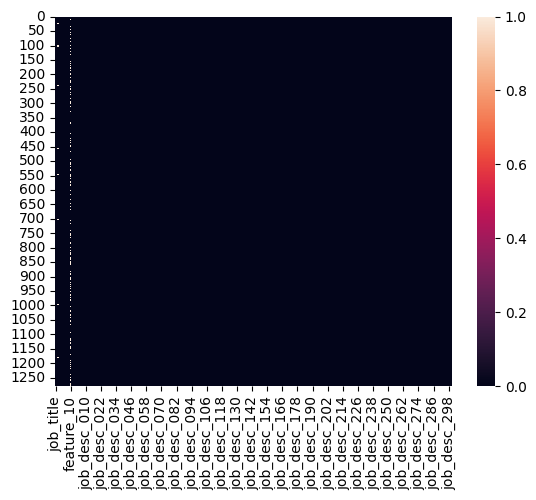

In [ ]:
import seaborn as sns 
sns.heatmap(X_train.isnull())

In [ ]:
X_train.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int32')], dtype=object)

In [ ]:
pipeline=Pipeline(
    [
        ("transformer",column_transform)
    ]
)

In [ ]:
pipeline.fit(X_train)

X_trained_processed = pipeline.transform(X_train)
X_trained_processed

array([[ 0.46477322, -0.3602    , -0.2236985 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.14717881, -0.3602    , -0.2236985 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.20977889, -0.3602    , -0.2236985 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.12256281, -0.3602    , -0.2236985 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.0659181 , -0.3602    , -0.2236985 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0670786 , -0.3602    , -0.2236985 , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_trained_processed.shape

(1280, 421)

In [ ]:
np.unique(Y_train)

array([1, 2, 3], dtype=int64)

In [ ]:
Y_train.shape

(1280,)

### he he he some help from chatgpt

In [ ]:

from tensorflow.keras.utils import to_categorical

# Subtract 1 from Y_train to make the labels zero-indexed
Y_train_zero_indexed = Y_train - 1

# Now apply to_categorical with the correct number of classes
Y_train_one_hot = to_categorical(Y_train_zero_indexed, num_classes=3)

# Work with Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

model=Sequential(
    [
        Dense(180,activation="relu",input_shape=[X_trained_processed.shape[1]]),
        BatchNormalization(),
        Dropout(.2),

        Dense(100,activation="relu"),
        BatchNormalization(),
        Dropout(.2),
        
        Dense(20,activation="relu"),
        BatchNormalization(),
        Dropout(.2),

        Dense(3,activation="softmax")
    ]
)
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                │ (None, 180)            │        75,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 180)            │           720 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 100)            │        18,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,343 (380.25 KB)

 Trainable params: 96,743 (377.90 KB)

 Non-trainable params: 600 (2.34 KB)

In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='accuracy', factor=0.3, patience=10, min_lr=1e-6
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', patience=25, restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='ai/ann_best_model.keras',      
    monitor='accuracy',                 
    mode='max',                        
    save_best_only=True,                 
    verbose=1
)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(.01),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy', 'AUC', 'Precision'])

In [ ]:
history=model.fit(X_trained_processed,Y_train_one_hot,epochs=200,validation_split=0.2,batch_size=16,callbacks=[early_stopping,lr_scheduler,checkpoint])

Epoch 1/200


63/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9970 - Precision: 0.9694 - accuracy: 0.9684 - loss: 0.1027
Epoch 1: accuracy improved from -inf to 0.95996, saving model to ai/ann_best_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - AUC: 0.9969 - Precision: 0.9692 - accuracy: 0.9681 - loss: 0.1037 - val_AUC: 0.8435 - val_Precision: 0.6988 - val_accuracy: 0.6914 - val_loss: 1.3987 - learning_rate: 0.0100
Epoch 2/200
53/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9940 - Precision: 0.9476 - accuracy: 0.9447 - loss: 0.1462
Epoch 2: accuracy did not improve from 0.95996
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9938 - Precision: 0.9478 - accuracy: 0.9443 - loss: 0.1483 - val_AUC: 0.8564 - val_Precision: 0.7362 - val_accuracy: 0.7344 - val_loss: 1.1937 - learning_rate: 0.0100
Epoch 3/200
48/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9948 - Precision: 0.9534 - accuracy: 0.9490 - loss: 0.1312
Epoch 3: accuracy did not improve from 0.95996
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - 

In [ ]:
Test_X_encoded=pipeline.transform(Test_X)

In [ ]:
Test_X_encoded.shape

(854, 421)

In [ ]:
model = tf.keras.models.load_model(".//ai/ann_best_model.keras")

In [ ]:
pred_y=model.predict(Test_X_encoded)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
pred_y

array([[9.9929667e-01, 7.0321001e-04, 1.6503252e-07],
       [2.8722810e-02, 9.6408790e-01, 7.1892454e-03],
       [9.9999905e-01, 9.2857380e-07, 6.4296866e-09],
       ...,
       [9.4172263e-01, 3.0688921e-02, 2.7588399e-02],
       [8.6403525e-01, 8.4469788e-02, 5.1494971e-02],
       [9.9113524e-01, 8.8646896e-03, 2.3500960e-13]], dtype=float32)

In [ ]:
# Define the mapping based on index
index_to_label = {0: 'High', 1: 'Medium', 2: 'Low'}

# Get the index of the max probability for each row
predicted_indices = np.argmax(pred_y, axis=1)

# Map the indices to labels
predicted_labels = [index_to_label[idx] for idx in predicted_indices]
predicted_labels

['High',
 'Medium',
 'High',
 'Low',
 'High',
 'Low',
 'High',
 'Low',
 'Medium',
 'High',
 'Medium',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'High',
 'High',
 'High',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'High',
 'High',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'Medium',
 'Low',
 'Medium',
 'High',
 'Low',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'High',
 'Low',
 'High',
 'Low',
 'Medium',
 'High',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Medium',
 'Medium',
 'Low',
 'High',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'Medium',
 'High',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'Low',
 'Medium',
 'Medium',
 'High'

In [ ]:
import pandas as pd
import numpy as np

# Read the test data
test = pd.read_csv("../Dataset/engineers_salary_prediction_test.csv")


print(mapped_preds)
# Create submission DataFrame
submission = pd.DataFrame({
    "obs": test["obs"],  # assuming obs starts at 1281
    "salary_category": predicted_labels
})

submission.to_csv("new_engineerr_salary_submission.csv", index=False)


['Low', 'Medium', 'Low', 'High', 'Low', 'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'Low', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'High', 'Medium', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'High', 'Medium', 'Low', 'Medium', 'High', 'Medium', 'High', 'Medium', 'Medium', 'High', 'Low', 'High', 'Low', 'High', 'Medium', 'Low', 'High', 'High', 'High', 'Medium', 'Low', 'High', 'Medium', 'High', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'High', 'High', 'Medium', 'Medium', 'High', 'High', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'High', 'Low', 'Low', 'High', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'High', 'High', 'Medium', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'Low', 'Medium', 'High', 'Medium', 'High', 'High', 

### Let's try PCA with ANN

In [184]:
features=df.columns.tolist()
job_features=[f for f in features if f.startswith("job_desc")]

In [185]:
X_train[job_features]

,job_desc_001,job_desc_002,job_desc_003,job_desc_004,job_desc_005,job_desc_006,job_desc_007,job_desc_008,job_desc_009,job_desc_010,job_desc_011,job_desc_012,job_desc_013,job_desc_014,job_desc_015,job_desc_016,job_desc_017,job_desc_018,job_desc_019,job_desc_020,job_desc_021,job_desc_022,job_desc_023,job_desc_024,job_desc_025,job_desc_026,job_desc_027,job_desc_028,job_desc_029,job_desc_030,job_desc_031,job_desc_032,job_desc_033,job_desc_034,job_desc_035,job_desc_036,job_desc_037,job_desc_038,job_desc_039,job_desc_040,...,job_desc_261,job_desc_262,job_desc_263,job_desc_264,job_desc_265,job_desc_266,job_desc_267,job_desc_268,job_desc_269,job_desc_270,job_desc_271,job_desc_272,job_desc_273,job_desc_274,job_desc_275,job_desc_276,job_desc_277,job_desc_278,job_desc_279,job_desc_280,job_desc_281,job_desc_282,job_desc_283,job_desc_284,job_desc_285,job_desc_286,job_desc_287,job_desc_288,job_desc_289,job_desc_290,job_desc_291,job_desc_292,job_desc_293,job_desc_294,job_desc_295,job_desc_296,job_desc_297,job_desc_298,job_desc_299,job_desc_300
0,0.193511,2.275482,-0.440363,-0.327473,0.058464,-0.154043,-0.393158,-0.367905,-0.703665,0.562969,0.058359,-0.632267,0.326872,-0.276131,0.098252,0.019475,0.105348,-0.411405,0.635027,-0.192049,3.849681,0.529550,0.269379,0.091730,-0.639549,0.047043,-0.159783,-0.322949,-0.492766,0.161221,0.013862,-0.194594,0.395389,-0.287041,0.400163,-0.324728,-0.675304,0.013366,0.060568,0.076885,...,0.111471,0.266141,-0.142156,-0.684483,-0.174529,0.467105,-0.024953,-0.167435,-0.342473,0.185418,-0.233041,-0.016037,0.602155,-0.511326,0.602380,-0.254410,-0.114025,0.086060,-0.012974,0.523685,-0.864781,0.084526,0.154640,0.283154,-0.848735,-0.108635,0.049179,0.210502,-0.535840,0.113221,-0.362079,-0.499308,-0.367894,-0.214881,0.014870,-0.271177,-0.113347,-0.587955,-0.919095,-0.207340
1,0.100152,2.291134,-0.356041,-0.494735,0.038632,-0.356995,-0.633020,-0.444805,-0.252597,0.187210,0.261958,-0.734535,0.264041,-0.209023,0.144627,-0.182167,0.144194,-0.436690,0.405126,-0.240945,3.781854,0.436835,0.150631,0.118699,-0.336167,-0.148608,0.150601,-0.284540,-0.915190,-0.018915,0.126589,-0.231199,0.604595,-0.284158,0.078514,-0.208533,-0.529389,0.088278,0.041133,-0.037323,...,-0.033901,0.475052,-0.016039,-0.412693,-0.424291,0.518947,-0.151527,-0.065834,-0.395344,0.048340,-0.198469,0.026100,0.390649,-0.484126,0.533130,-0.196634,-0.330162,0.200502,0.047225,0.263908,-0.817924,-0.069964,0.357457,0.323456,-0.977607,-0.034979,-0.053379,-0.027340,-0.511633,-0.105435,-0.300989,-0.415411,-0.341824,-0.319064,0.042322,-0.124755,0.023489,-0.893224,-0.823024,0.112364
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [263]:
from sklearn.decomposition import PCA

pca=PCA(15)
new_job_features=pca.fit_transform(X_train[job_features])

pca_df=pd.DataFrame(new_job_features,columns=["PCA_1","PCA_2","PCA_3","PCA_4","PCA_5","PCA_6","PCA_7","PCA_8","PCA_9","PCA_10","PCA_11","PCA_12","PCA_13","PCA_14","PCA_15"])
pca_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15
0,1.380112,0.469987,-0.075655,-1.038070,0.417364,-0.591890,-0.349069,0.128737,0.344107,0.286108,-0.300371,0.090597,-0.380345,-0.385681,-0.437636
1,1.210201,0.024486,-0.126489,-1.323580,0.505531,-0.470055,-0.958410,-0.599482,0.581677,-0.649324,0.075285,-0.215050,0.548066,-0.107075,-0.100766
2,-7.344770,-0.170561,0.067727,0.056237,-0.017499,-0.233536,0.121877,-0.030255,0.088046,0.049791,-0.032132,0.032178,-0.002547,-0.030970,0.002572
3,-7.344770,-0.170561,0.067727,0.056237,-0.017499,-0.233536,0.121877,-0.030255,0.088046,0.049791,-0.032132,0.032178,-0.002547,-0.030970,0.002572
4,1.261816,-1.331539,-0.602937,-0.419042,0.312947,-0.456932,-0.397784,0.386785,0.059505,0.020821,0.414080,0.514070,0.568281,0.036273,0.082863


In [264]:
X_train_pca=X_train.drop(columns=job_features)
X_train_pca=pd.concat([X_train_pca,pca_df],axis=1)
X_train_pca.head()

,job_title,job_posted_date,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15
0,Others,2024/07,NY,A,0.6429,0,0,1,1,1,0,0,60.0,1,0,1.380112,0.469987,-0.075655,-1.038070,0.417364,-0.591890,-0.349069,0.128737,0.344107,0.286108,-0.300371,0.090597,-0.380345,-0.385681,-0.437636
1,Job_Title_1,2024/07,CA,A,0.4678,0,0,0,1,1,1,0,60.0,1,1,1.210201,0.024486,-0.126489,-1.323580,0.505531,-0.470055,-0.958410,-0.599482,0.581677,-0.649324,0.075285,-0.215050,0.548066,-0.107075,-0.100766
2,Others,2024/07,CA,A,0.4610,0,0,0,1,1,1,0,36.0,1,1,-7.344770,-0.170561,0.067727,0.056237,-0.017499,-0.233536,0.121877,-0.030255,0.088046,0.049791,-0.032132,0.032178,-0.002547,-0.030970,0.002572
3,Others,2024/07,CA,A,0.5064,0,0,0,1,1,1,0,72.0,1,1,-7.344770,-0.170561,0.067727,0.056237,-0.017499,-0.233536,0.121877,-0.030255,0.088046,0.049791,-0.032132,0.032178,-0.002547,-0.030970,0.002572
4,Others,2024/07,CA,A,0.4640,0,0,0,1,1,0,0,48.0,1,1,1.261816,-1.331539,-0.602937,-0.419042,0.312947,-0.456932,-0.397784,0.386785,0.059505,0.020821,0.414080,0.514070,0.568281,0.036273,0.082863


In [265]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder



numaric_columns=X_train_pca.select_dtypes(include=["int","float64"]).columns.tolist()
catagory_columns=X_train_pca.select_dtypes(include=["object"]).columns.tolist()

print(f"Found {len(numaric_columns)} numaric columns and {len(catagory_columns)} catagorical columns")
num_pipeline=Pipeline(
    [
        ("impute",SimpleImputer(strategy="mean")),
        ("standard",StandardScaler()),
    ]
)
cat_pipeline=Pipeline(
    [
        ("impute",SimpleImputer(strategy="most_frequent")),
        ("odrinal",OneHotEncoder(handle_unknown="ignore")),
    ]
)

column_transform=ColumnTransformer(
    [
        ("numaric",num_pipeline,numaric_columns),
        ("cat",cat_pipeline,catagory_columns),
    ]
)

Found 26 numaric columns and 4 catagorical columns


In [266]:
pipeline=Pipeline(
    [
        ("transformer",column_transform)
    ]
)
pipeline.fit(X_train_pca)

X_trained_processed = pipeline.transform(X_train_pca)
X_trained_processed.shape

(1280, 136)

In [267]:

from tensorflow.keras.utils import to_categorical

# Subtract 1 from Y_train to make the labels zero-indexed
Y_train_zero_indexed = Y_train - 1

# Now apply to_categorical with the correct number of classes
Y_train_one_hot = to_categorical(Y_train_zero_indexed, num_classes=3)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

model=Sequential(
    [
        Dense(136,activation="relu",input_shape=[X_trained_processed.shape[1]]),
        BatchNormalization(),
        Dropout(.2),

        Dense(100,activation="relu"),
        BatchNormalization(),
        Dropout(.2),

        Dense(10,activation="relu"),
        BatchNormalization(),
        Dropout(.2),

        Dense(3,activation="softmax")
    ]
)
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_94 (Dense)                │ (None, 136)            │        18,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 136)            │           544 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_70 (Dropout)            │ (None, 136)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 100)            │        13,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,359 (134.21 KB)

 Trainable params: 33,867 (132.29 KB)

 Non-trainable params: 492 (1.92 KB)

In [296]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.3, patience=10, min_lr=1e-6
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=35, restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='pca/ann_best_model.keras',      
    monitor='val_accuracy',                 
    mode='max',                        
    save_best_only=True,                 
    verbose=1
)


In [297]:
model.compile(optimizer=tf.keras.optimizers.Adam(.01),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy', 'AUC', 'Precision'])

In [305]:

# history=model.fit(X_trained_processed,Y_train_one_hot,epochs=200,validation_split=0.2,batch_size=20,callbacks=[early_stopping,lr_scheduler,checkpoint])

# Trying Advanced Modified model strucure from ChatGPT

In [356]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.initializers import HeNormal, Constant


# Build the model
model = Sequential([
    # Input layer + first hidden block
    Dense(512,
          kernel_initializer=HeNormal(),
          bias_initializer=Constant(0.1),
          input_shape=(X_trained_processed.shape[1],)
    ),
    BatchNormalization(),
    Activation('relu'),
    # Or use LeakyReLU(alpha=0.01):
    # LeakyReLU(alpha=0.01),
    Dropout(0.3),

    # Second hidden block
    Dense(256, kernel_initializer=HeNormal(), bias_initializer=Constant(0.1)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    # Third hidden block
    Dense(128, kernel_initializer=HeNormal(), bias_initializer=Constant(0.1)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    # Output layer for 3-class classification
    Dense(3, activation='softmax')
])

# Compile the model with Adam + LR schedule
model.compile(
    optimizer=Adam(learning_rate=.01),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'AUC', 'Precision']
)

# Callbacks
callbacks = [
    # Save only the best model based on validation loss
    ModelCheckpoint(
        filepath='gpt2/best_model.keras',
        monitor='accuracy',
        mode='max',
        save_best_only=True,
        verbose=2
    ),
    
    # Stop training early if no improvement (prevents overfitting)
    EarlyStopping(
        monitor='accuracy',
        mode='max',
        patience=35,
        restore_best_weights=True,
        verbose=1
    ),
    
    # Reduce learning rate if stuck
    ReduceLROnPlateau(
        monitor='accuracy',
        mode='max',
        factor=0.3,
        patience=20,
        min_lr=1e-6,
        verbose=1
    )
]

# Display the model summary
model.summary()

# Example fit call:
history = model.fit(
    X_trained_processed, Y_train_one_hot,
    epochs=250,
    batch_size=32,
    validation_split=.2,
    callbacks=callbacks
)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_174 (Dense)               │ (None, 512)            │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_130         │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_57 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_130 (Dropout)           │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_131         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_58 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_131 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_132         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_59 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_132 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,339 (931.01 KB)

 Trainable params: 236,547 (924.01 KB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/250
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.6655 - Precision: 0.5050 - accuracy: 0.4845 - loss: 1.2074
Epoch 1: accuracy improved from -inf to 0.56543, saving model to gpt2/best_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - AUC: 0.6796 - Precision: 0.5204 - accuracy: 0.4991 - loss: 1.1801 - val_AUC: 0.7079 - val_Precision: 0.5582 - val_accuracy: 0.5508 - val_loss: 2.1998 - learning_rate: 0.0100
Epoch 2/250
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8218 - Precision: 0.6939 - accuracy: 0.6383 - loss: 0.8146
Epoch 2: accuracy improved from 0.56543 to 0.67480, saving model to gpt2/best_model.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - AUC: 0.8232 - Precision: 0.6961 - accuracy: 0.6405 - loss: 0.8110 - val_AUC: 0.8228 - val_Precision: 0.6878 - val_accuracy: 0.6836 - val_loss: 1.0987 - learning_rate: 0.0100
Epoch 3/250
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.8883 - Precision: 0.7886 - accuracy: 0.7461 - loss: 0.6461
Epoch 3: accuracy improved from 0.

In [350]:
model=tf.keras.models.load_model("gpt2/best_model.keras")

In [357]:
test_pca=pca.transform(Test_X[job_features])

test_pca_df=pd.DataFrame(test_pca,columns=["PCA_1","PCA_2","PCA_3","PCA_4","PCA_5","PCA_6","PCA_7","PCA_8","PCA_9","PCA_10","PCA_11","PCA_12","PCA_13","PCA_14","PCA_15"])

new_Test_X=Test_X.drop(columns=job_features)

Test_X_pca=pd.concat([new_Test_X,test_pca_df],axis=1)

Test_X_pca.head()

,job_title,job_posted_date,job_state,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15
0,Others,2024/06,CA,A,0.6473,0,0,1,1,0,0,0,36.0,1,0,1.071270,-0.544388,-0.441977,0.474749,0.261783,0.168065,0.155831,-0.105221,-0.855129,0.077505,0.340463,0.791441,-0.375751,-0.196253,-0.378314
1,Others,2024/08,NY,A,0.4238,1,0,0,0,0,0,0,60.0,1,0,1.035270,-0.466104,-0.665476,0.675356,0.667040,0.015550,0.522456,-1.674080,-0.543447,-0.239287,0.530151,0.242503,-0.836072,-0.325414,1.046846
2,Others,2023/01,CA,A,0.6219,1,0,0,1,1,0,0,120.0,1,1,1.614346,0.096122,2.027837,-0.988678,-0.351694,-0.114182,0.128963,-0.496279,-0.034282,-0.258599,0.033734,-0.201151,0.423814,-0.417021,0.093116
3,Job_Title_5,2024/06,NY,A,0.6704,0,0,0,1,0,0,0,36.0,1,0,1.398380,0.421391,0.254911,0.300071,-0.438445,-0.164509,-0.934464,-0.854196,1.057971,0.206792,-0.485801,-0.027462,0.201683,-0.141402,0.047435
4,Others,2024/05,CA,A,0.7310,0,0,0,1,1,0,0,144.0,1,0,1.174363,-0.476998,-0.661285,-0.686967,-0.349405,-0.790193,0.474133,0.709674,-0.420866,-0.132481,0.558299,-0.908974,-0.282736,-0.180746,-0.619603


In [358]:
Test_X_encoded=pipeline.transform(Test_X_pca)

In [359]:
pred_y=model.predict(Test_X_encoded)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [360]:
# Define the mapping based on index
index_to_label = {0: 'High', 1: 'Medium', 2: 'Low'}

# Get the index of the max probability for each row
predicted_indices = np.argmax(pred_y, axis=1)

# Map the indices to labels
predicted_labels = [index_to_label[idx] for idx in predicted_indices]
predicted_labels

['High',
 'Medium',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'High',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Low',
 'High',
 'Medium',
 'High',
 'Low',
 'Medium',
 'High',
 'Medium',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'High',
 'Low',
 'High',
 'Low',
 'Medium',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'Medium',
 'Low',
 'High',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'High',
 'Low',
 'High',
 'Low',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'Medium',
 'High',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'High',
 'High',
 'Medium',
 'High',
 'Medium',
 'High',
 'Medium',
 'Low',
 'Medium',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'Medium',
 'High',
 'Low',
 'High',
 'Low',
 'Medium',
 'High',
 'High',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Medium',
 'High',
 'High

In [361]:
import pandas as pd
import numpy as np

# Read the test data
test = pd.read_csv("../Dataset/engineers_salary_prediction_test.csv")

# Create submission DataFrame
submission = pd.DataFrame({
    "obs": test["obs"],  # assuming obs starts at 1281
    "salary_category": predicted_labels
})

submission.to_csv("pca_new_engineer_salary_submission.csv", index=False)
